#                         INSAID INTERNSHIP ASSIGNMENT

### Business Context

### This case requires trainees to develop a model for predicting fraudulent transactions for a financial company and use insights from the model to develop an actionable plan. Data for the case is available in CSV format having 6362620 rows and 10 columns. Candidates can use whatever method they wish to develop their machine learning model.Following usual model development procedures, the model would be estimated on the calibration data and tested on the validation data. This case requires both statistical analysis and creativity/judgment. We recommend you spend time on both fine-tuning and interpreting the results of your machine learning model. 

# Your task is to execute the process for proactive detection of fraud while answering following
## questions.
#### 1. Data cleaning including missing values, outliers and multi-collinearity.
#### 2. Describe your fraud detection model in elaboration.
#### 3. How did you select variables to be included in the model?
#### 4. Demonstrate the performance of the model by using best set of tools.
#### 5. What are the key factors that predict fraudulent customer?
#### 6. Do these factors make sense? If yes, How? If not, How not?
#### 7. What kind of prevention should be adopted while company update its infrastructure?
#### 8. Assuming these actions have been implemented, how would you determine if they work?

###### a dataset set with 11 variables and 1 target variable

## Import Packages 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay


C:\Users\JOSH\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\JOSH\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\JOSH\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


### Import the dataset to understand categories of the entries

In [2]:
df = pd.read_csv("Fraud.csv")
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


### Descriptive statistics of the data

In [3]:
# checking the shape of the entries

df.shape

(6362620, 11)

In [4]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [5]:
df.drop(columns="nameDest", inplace=True)


##### - the data contains 6362620 rows and 11 columns

In [6]:
# retrieving information about the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   oldbalanceDest  float64
 7   newbalanceDest  float64
 8   isFraud         int64  
 9   isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 485.4+ MB


In [7]:
# checking for any null entry

df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [8]:
# checking for unique values

df.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

In [9]:
# checking for duplicate columns

df.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
6362615    False
6362616    False
6362617    False
6362618    False
6362619    False
Length: 6362620, dtype: bool

##### - the dataframe is without a null value

### Statistics

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00


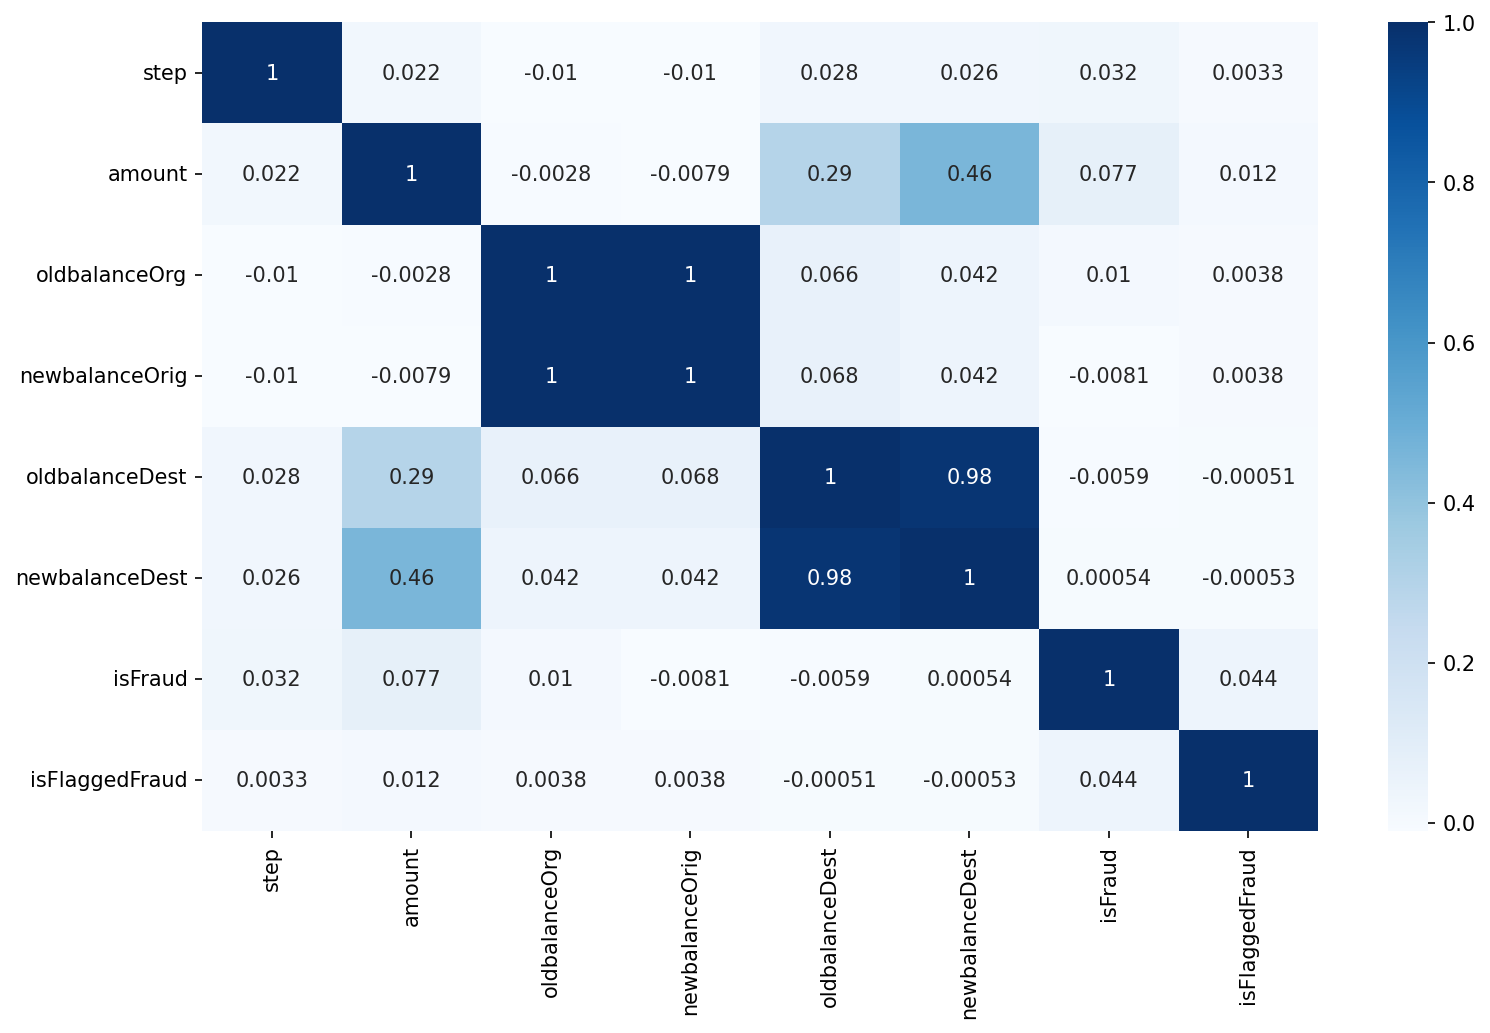

In [11]:
# plotting the corrlation on heat map
plt.figure(figsize=[12,7], dpi=150)
sns.heatmap(data=df.corr(), cmap="Blues", annot= True )
plt.show()

In [12]:
fraud= df[df['isFraud'] == 1]
legit_count = len(df[df.isFraud==0])
fraud_count= len(df[df.isFraud == 1])
perc_legit = (legit_count/(legit_count + fraud_count))*100
perc_fraud = (fraud_count/ (fraud_count + legit_count))*100

In [13]:
print("The number of legit transaction: ", legit_count)
print("The number of Fraudulent transaction: ", fraud_count)
print("percentage of legit transaction: ", perc_legit, "%")
print("percenttage of fraudulent transaction: ", perc_fraud, "%")

The number of legit transaction:  6354407
The number of Fraudulent transaction:  8213
percentage of legit transaction:  99.87091795518198 %
percenttage of fraudulent transaction:  0.12908204481801522 %


In [14]:
def cat_charts(df, x=""):
    sns.set(style="dark")
    plt.figure(figsize=[15,10])
    total=float(len(df[x]))
    ax=sns.countplot(x=x, data=df)
    plt.title("is Fraud", fontsize=20)
    for p in ax.patches:
        percentage= '{:.1f}%'.format(100*p.get_height()/total)
        x=p.get_x() + p.get_width()
        y=p.get_height()
        ax.annotate(text=percentage, xy=(x, y), ha="center")
    plt.show()

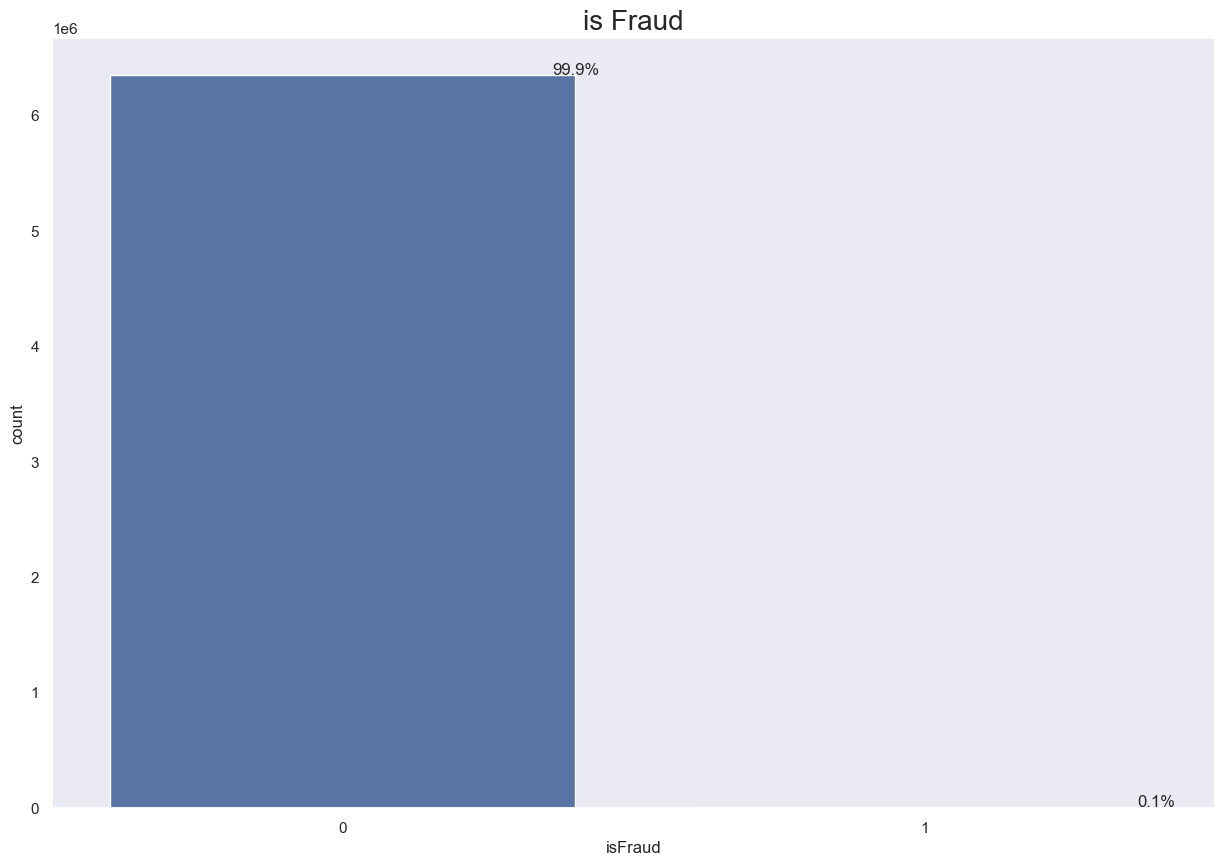

In [15]:
cat_charts(df, "isFraud")

###### target variable is highly not balance

###### As we can see, NEWBALACEDEST and OLDBALACEDEST are highly correlated, as are NEWBALANCEORG and OLDBALANCEORG, therefore we can identify multi-collinearity in our dataframe.

### Visualizing categorical columns with the target variable

In [16]:
def chart_with_target(df, x="", title=""):
    sns.set(style="dark")
    plt.figure(figsize=[15,10])
    total=float(len(df[x]))
    ax=sns.countplot(x=x, data=df, hue="isFraud")
    plt.title(title, fontsize=20)
    for p in ax.patches:
        percentage= '{:.1f}%'.format(100*p.get_height()/total)
        x=p.get_x() + p.get_width()
        y=p.get_height()
        ax.annotate(text=percentage, xy=(x, y), ha="center")
    plt.show()

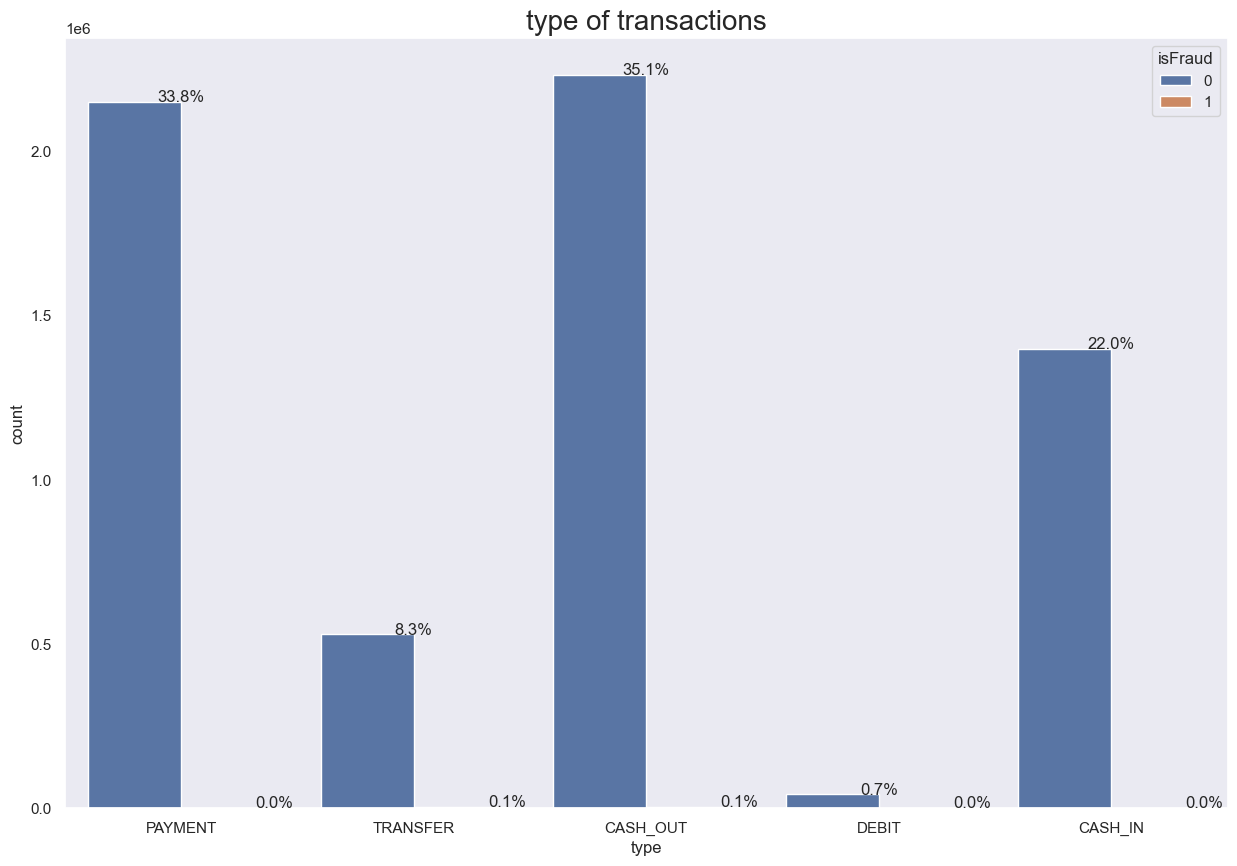

In [17]:
chart_with_target(df, "type", "type of transactions")

##### the transaction was more of CASH OUT TYPE

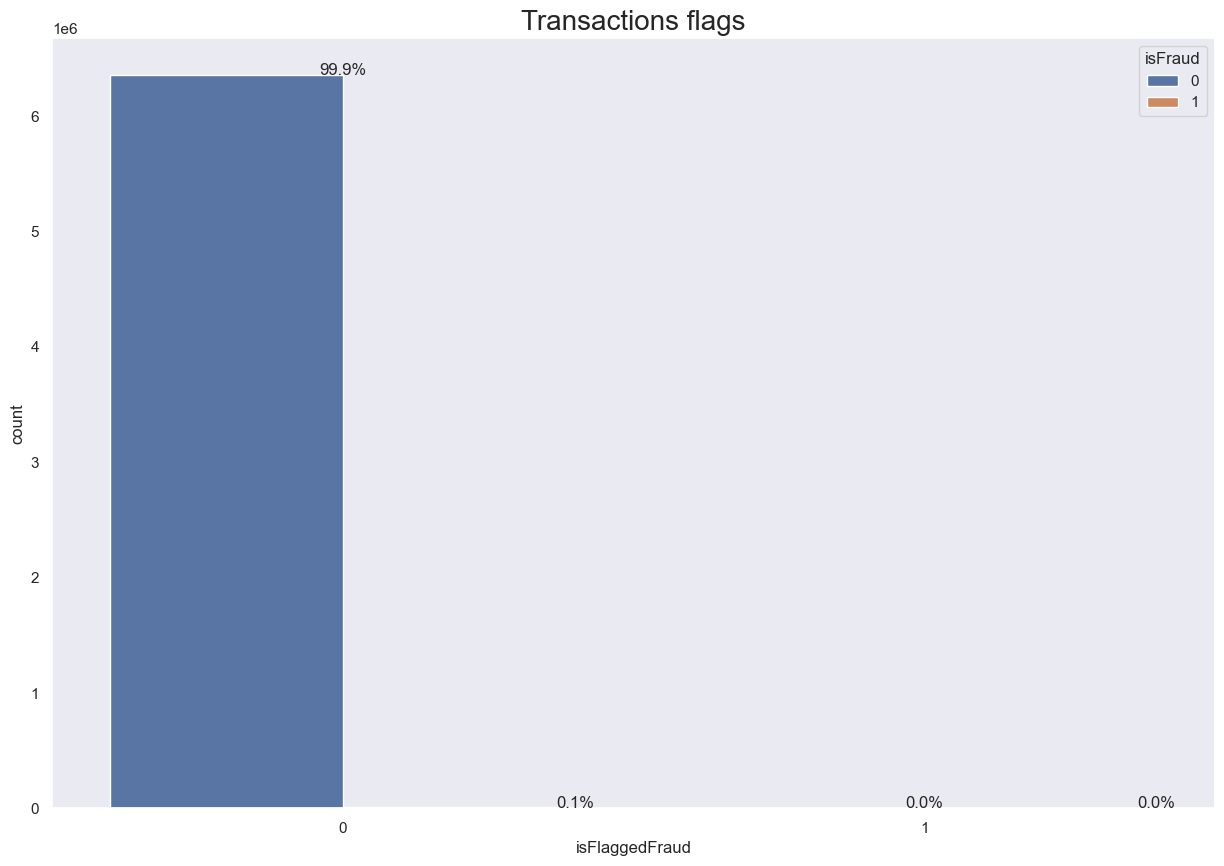

In [18]:
chart_with_target(df, "isFlaggedFraud", "Transactions flags")

## Visualizing the numerical entry in the data

<Figure size 700x700 with 0 Axes>

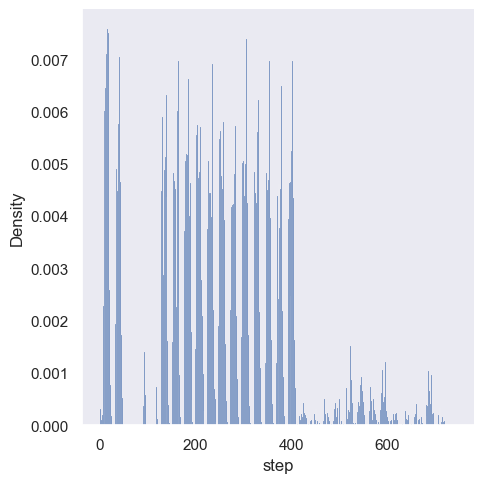

In [19]:
## plotting the steps

plt.figure(figsize=[7,7])
sns.displot(df["step"], stat= "density")
plt.show()

<AxesSubplot:xlabel='amount', ylabel='Density'>

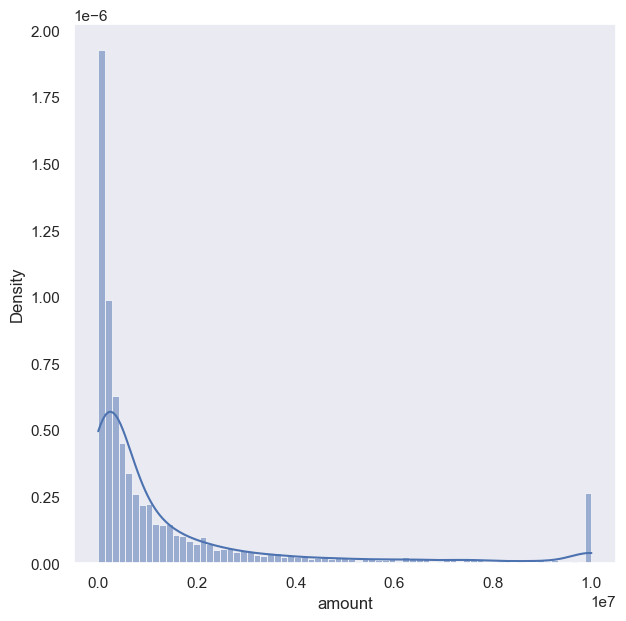

In [20]:
plt.figure(figsize=[7,7])
sns.histplot(fraud["amount"], stat="density", kde=True)

###### We have a right-skewed distribution, indicating that fraud occurs more frequently when the amount is low.

In [21]:
Type=pd.get_dummies(df["type"], prefix="type", drop_first=True, dtype="int64")
Type.head(5)

,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,0,0,1,0
1,0,0,1,0
2,0,0,0,1
3,1,0,0,0
4,0,0,1,0


In [22]:
Type.dtypes

type_CASH_OUT    int64
type_DEBIT       int64
type_PAYMENT     int64
type_TRANSFER    int64
dtype: object

In [23]:
#multicollinearity
new_df=pd.concat([df,Type], axis=1)

In [24]:
new_df.drop(columns=['type','isFlaggedFraud', 'nameOrig'], inplace=True)

In [25]:
X= new_df.drop(columns='isFraud')
y=new_df.isFraud

In [26]:
x_train, x_test, y_train, y_test=train_test_split(X, y, random_state=1, test_size=0.2)

In [27]:
corrmatrix = x_train.corr()
corrmatrix

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
step,1.000000,0.022359,-0.010033,-0.010302,0.027801,0.026037,-0.012809,0.002890,0.004940,0.006791
amount,0.022359,1.000000,-0.002661,-0.007821,0.293953,0.459355,-0.004463,-0.023307,-0.196964,0.365162
oldbalanceOrg,-0.010033,-0.002661,1.000000,0.998794,0.066445,0.042204,-0.200857,-0.021440,-0.189450,-0.081571
newbalanceOrig,-0.010302,-0.007821,0.998794,1.000000,0.068009,0.042008,-0.210931,-0.021861,-0.193876,-0.087343
oldbalanceDest,0.027801,0.293953,0.066445,0.068009,1.000000,0.976476,0.085830,0.009729,-0.231626,0.131139
newbalanceDest,0.026037,0.459355,0.042204,0.042008,0.976476,1.000000,0.093232,0.006708,-0.238399,0.192310
type_CASH_OUT,-0.012809,-0.004463,-0.200857,-0.210931,0.085830,0.093232,1.000000,-0.059602,-0.526496,-0.222748
type_DEBIT,0.002890,-0.023307,-0.021440,-0.021861,0.009729,0.006708,-0.059602,1.000000,-0.057840,-0.024471
type_PAYMENT,0.004940,-0.196964,-0.189450,-0.193876,-0.231626,-0.238399,-0.526496,-0.057840,1.000000,-0.216163
type_TRANSFER,0.006791,0.365162,-0.081571,-0.087343,0.131139,0.192310,-0.222748,-0.024471,-0.216163,1.000000


<AxesSubplot:>

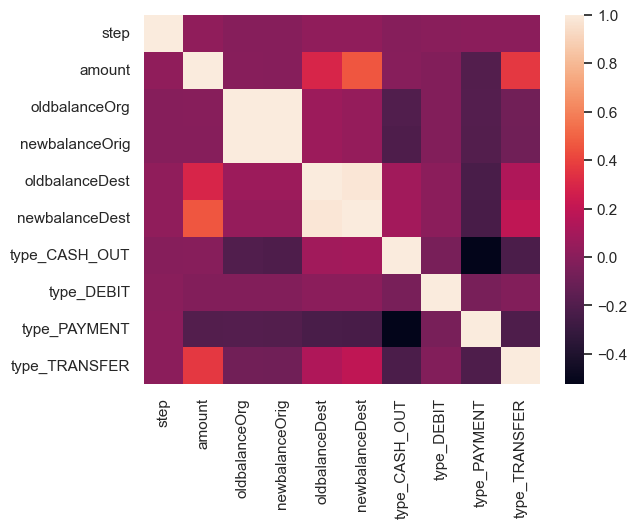

In [28]:
sns.heatmap(corrmatrix)

In [29]:
def correlation(df, threshold):
    correlated_cols=set()
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j])> threshold:
                colname=corr_matrix.columns[i]
                correlated_cols.add(colname)
    return correlated_cols

In [30]:
correlation(x_train, 0.6)

{'newbalanceDest', 'newbalanceOrig'}

In [31]:
corr_feat=correlation(x_train, 0.6)

In [32]:
corr_feat

{'newbalanceDest', 'newbalanceOrig'}

In [33]:
x_train.shape, x_test.shape

((5090096, 10), (1272524, 10))

In [34]:
x_train.drop(labels=corr_feat, axis=1, inplace=True)
x_test.drop(labels=corr_feat, axis=1, inplace=True)

In [35]:
lr = LogisticRegression(penalty="l2", random_state=1)
lr.fit(x_train, y_train)

LogisticRegression(random_state=1)

In [36]:
y_predict=lr.predict(x_test)

In [37]:
acc=accuracy_score(y_predict, y_test)

In [38]:
acc

0.9987057218567194

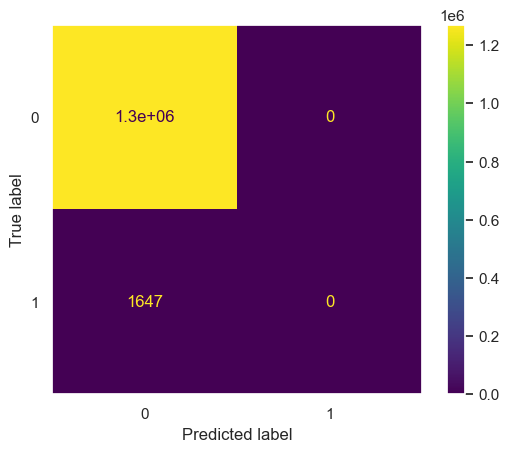

In [39]:
confusion=confusion_matrix(y_test, y_predict, labels=lr.classes_)
display=ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=lr.classes_)
display.plot()